# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

## Import Resources

In [1]:
# TODO: Make all necessary imports.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import glob
import json
import time
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
tfds.disable_progress_bar
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)
print('Using:')
print('\t\u2022 TensorFlow version:', tf.__version__)
print('\t\u2022 Running on GPU' if tf.test.is_gpu_available() else '\t\u2022 GPU device not found. Running on CPU')

2025-05-12 19:26:17.826741: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-12 19:26:17.826803: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-12 19:26:17.826855: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using:
	• TensorFlow version: 2.14.0
	• Running on GPU


# Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [2]:
# TODO: Load the dataset with TensorFlow Datasets.
#!python -m tensorflow_datasets.scripts.download_and_prepare --datasets=oxford_flowers102

data_set, dataset_info  = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)

# TODO: Create a training set, a validation set and a test set.
training_set, validation_set, test_set = data_set['train'],data_set['validation'], data_set['test']

dataset_info

Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/2 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/3 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/3 [00:01<?, ? url/s]
Dl Size...: 0 MiB [00:01, ? MiB/s]

Dl Completed...:  33%|███▎      | 1/3 [00:01<00:03,  1.61s/ url]
Dl Size...: 0 MiB [00:01, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:02<?, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:02<?, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:02<?, ? MiB/s]

Extraction completed...: 0 file [00:02, ? file/s]
Dl Size...:   0%|          | 1/328 [00:02<14:12,  2.61s/ MiB]

Dl Size...:   1%|          | 2/328 [00:02<14:09,  2.61s/ MiB]

Dl Size...:   1%|          | 3/328 [00:02<14:06,  2.61s/ MiB]

Dl Size...:   1%|          | 4/328 [00:02<14:04

Dl Size...:  16%|█▋        | 54/328 [00:05<00:22, 12.35 MiB/s]

Dl Size...:  17%|█▋        | 55/328 [00:05<00:22, 12.35 MiB/s]

Dl Size...:  17%|█▋        | 56/328 [00:05<00:22, 12.35 MiB/s]

Dl Size...:  17%|█▋        | 57/328 [00:05<00:21, 12.35 MiB/s]

Dl Size...:  18%|█▊        | 58/328 [00:05<00:21, 12.35 MiB/s]

Dl Size...:  18%|█▊        | 59/328 [00:05<00:21, 12.35 MiB/s]

Dl Size...:  18%|█▊        | 60/328 [00:05<00:21, 12.35 MiB/s]

Dl Size...:  19%|█▊        | 61/328 [00:05<00:21, 12.35 MiB/s]

Dl Size...:  19%|█▉        | 62/328 [00:05<00:21, 12.35 MiB/s]

Dl Size...:  19%|█▉        | 63/328 [00:05<00:21, 12.35 MiB/s]

Dl Size...:  20%|█▉        | 64/328 [00:05<00:21, 12.35 MiB/s]

Dl Size...:  20%|█▉        | 65/328 [00:05<00:21, 12.35 MiB/s]

Dl Size...:  20%|██        | 66/328 [00:05<00:21, 12.35 MiB/s]

Dl Size...:  20%|██        | 67/328 [00:05<00:21, 12.35 MiB/s]

Extraction completed...: 0 file [00:05, ? file/s]
Dl Size...:  21%|██        | 68/328 [00:05<00:16, 15.7

Dl Size...:  35%|███▌      | 115/328 [00:08<00:12, 17.34 MiB/s]

Dl Size...:  35%|███▌      | 116/328 [00:08<00:12, 17.34 MiB/s]

Dl Size...:  36%|███▌      | 117/328 [00:08<00:12, 17.34 MiB/s]

Dl Size...:  36%|███▌      | 118/328 [00:08<00:12, 17.34 MiB/s]

Dl Size...:  36%|███▋      | 119/328 [00:08<00:12, 17.34 MiB/s]

Dl Size...:  37%|███▋      | 120/328 [00:08<00:11, 17.34 MiB/s]

Dl Size...:  37%|███▋      | 121/328 [00:08<00:11, 17.34 MiB/s]

Dl Size...:  37%|███▋      | 122/328 [00:08<00:11, 17.34 MiB/s]

Dl Size...:  38%|███▊      | 123/328 [00:08<00:11, 17.34 MiB/s]

Dl Size...:  38%|███▊      | 124/328 [00:08<00:11, 17.34 MiB/s]

Dl Size...:  38%|███▊      | 125/328 [00:08<00:11, 17.34 MiB/s]

Dl Size...:  38%|███▊      | 126/328 [00:08<00:11, 17.34 MiB/s]

Extraction completed...: 0 file [00:08, ? file/s]
Dl Size...:  39%|███▊      | 127/328 [00:08<00:11, 17.98 MiB/s]

Dl Size...:  39%|███▉      | 128/328 [00:08<00:11, 17.98 MiB/s]

Dl Size...:  39%|███▉      | 129/328 [00

Dl Size...:  53%|█████▎    | 175/328 [00:11<00:07, 19.25 MiB/s]

Dl Size...:  54%|█████▎    | 176/328 [00:11<00:07, 19.25 MiB/s]

Dl Size...:  54%|█████▍    | 177/328 [00:11<00:07, 19.25 MiB/s]

Dl Size...:  54%|█████▍    | 178/328 [00:11<00:07, 19.25 MiB/s]

Dl Size...:  55%|█████▍    | 179/328 [00:11<00:07, 19.25 MiB/s]

Dl Size...:  55%|█████▍    | 180/328 [00:11<00:07, 19.25 MiB/s]

Dl Size...:  55%|█████▌    | 181/328 [00:11<00:07, 19.25 MiB/s]

Dl Size...:  55%|█████▌    | 182/328 [00:11<00:07, 19.25 MiB/s]

Dl Size...:  56%|█████▌    | 183/328 [00:11<00:07, 19.25 MiB/s]

Dl Size...:  56%|█████▌    | 184/328 [00:11<00:07, 19.25 MiB/s]

Dl Size...:  56%|█████▋    | 185/328 [00:11<00:07, 19.25 MiB/s]

Dl Size...:  57%|█████▋    | 186/328 [00:11<00:07, 19.25 MiB/s]

Dl Size...:  57%|█████▋    | 187/328 [00:11<00:07, 19.25 MiB/s]

Dl Size...:  57%|█████▋    | 188/328 [00:11<00:07, 19.25 MiB/s]

Dl Size...:  58%|█████▊    | 189/328 [00:11<00:07, 19.25 MiB/s]

Dl Size...:  58%|█████▊  

Dl Size...:  72%|███████▏  | 235/328 [00:14<00:04, 20.45 MiB/s]

Dl Size...:  72%|███████▏  | 236/328 [00:14<00:04, 20.45 MiB/s]

Dl Size...:  72%|███████▏  | 237/328 [00:14<00:04, 20.45 MiB/s]

Dl Size...:  73%|███████▎  | 238/328 [00:14<00:04, 20.45 MiB/s]

Dl Size...:  73%|███████▎  | 239/328 [00:14<00:04, 20.45 MiB/s]

Dl Size...:  73%|███████▎  | 240/328 [00:14<00:04, 20.45 MiB/s]

Dl Size...:  73%|███████▎  | 241/328 [00:14<00:04, 20.45 MiB/s]

Dl Size...:  74%|███████▍  | 242/328 [00:14<00:04, 20.45 MiB/s]

Dl Size...:  74%|███████▍  | 243/328 [00:14<00:04, 20.45 MiB/s]

Dl Size...:  74%|███████▍  | 244/328 [00:14<00:04, 20.45 MiB/s]

Dl Size...:  75%|███████▍  | 245/328 [00:14<00:04, 20.45 MiB/s]

Dl Size...:  75%|███████▌  | 246/328 [00:14<00:04, 20.45 MiB/s]

Dl Size...:  75%|███████▌  | 247/328 [00:14<00:03, 20.45 MiB/s]

Dl Size...:  76%|███████▌  | 248/328 [00:14<00:03, 20.45 MiB/s]

Dl Size...:  76%|███████▌  | 249/328 [00:14<00:03, 20.45 MiB/s]

Dl Size...:  76%|███████▌

Dl Size...:  90%|████████▉ | 295/328 [00:16<00:01, 20.88 MiB/s]

Dl Size...:  90%|█████████ | 296/328 [00:16<00:01, 20.88 MiB/s]

Dl Size...:  91%|█████████ | 297/328 [00:17<00:01, 20.88 MiB/s]

Dl Size...:  91%|█████████ | 298/328 [00:17<00:01, 20.88 MiB/s]

Extraction completed...: 0 file [00:17, ? file/s]
Dl Size...:  91%|█████████ | 299/328 [00:17<00:01, 20.85 MiB/s]

Dl Size...:  91%|█████████▏| 300/328 [00:17<00:01, 20.85 MiB/s]

Dl Size...:  92%|█████████▏| 301/328 [00:17<00:01, 20.85 MiB/s]

Dl Size...:  92%|█████████▏| 302/328 [00:17<00:01, 20.85 MiB/s]

Dl Size...:  92%|█████████▏| 303/328 [00:17<00:01, 20.85 MiB/s]

Dl Size...:  93%|█████████▎| 304/328 [00:17<00:01, 20.85 MiB/s]

Dl Size...:  93%|█████████▎| 305/328 [00:17<00:01, 20.85 MiB/s]

Dl Size...:  93%|█████████▎| 306/328 [00:17<00:01, 20.85 MiB/s]

Dl Size...:  94%|█████████▎| 307/328 [00:17<00:01, 20.85 MiB/s]

Dl Size...:  94%|█████████▍| 308/328 [00:17<00:00, 20.85 MiB/s]

Dl Size...:  94%|█████████▍| 309/328 [00

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Extraction completed...:   0%|          | 0/8189 [01:32<?, ? file/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|███

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Extraction completed...:   2%|▏         | 164/8189 [01:33<205:21:49, 92.13s/ file]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Siz

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 21.11 MiB/s]

Extraction completed...:  18%|█▊        | 1461/8189 [01:41<01:52, 59.89 file/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 21.11 MiB/s]

Dl Size..

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Extraction completed...:  20%|█▉        | 1620/8189 [01:42<01:29, 73.18 file/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size..

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Extraction completed...:  22%|██▏       | 1780/8189 [01:43<01:13, 87.59 file/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size..

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Extraction completed...:  24%|██▎       | 1938/8189 [01:44<01:01, 101.58 file/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Extraction completed...:  26%|██▌       | 2098/8189 [01:45<00:53, 113.65 file/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 21.11 MiB/s]

Extraction completed...:  28%|██▊       | 2256/8189 [01:46<00:47, 124.59 file/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 21.11 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 21.11 MiB/s]

Extraction completed...:  39%|███▉      | 3215/8189 [01:52<00:32, 153.46 file/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 21.11 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 21.11 MiB/s]

Extraction completed...:  41%|████▏     | 3382/8189 [01:53<00:30, 155.88 file/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 21.11 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 21.11 MiB/s]

Extraction completed...:  80%|███████▉  | 6527/8189 [02:12<00:10, 162.53 file/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 21.11 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 21.11 MiB/s]

Extraction completed...:  92%|█████████▏| 7509/8189 [02:18<00:04, 159.22 file/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 21.11 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 21.11 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 21.11 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 21.11 MiB/s]

Generating train examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]
                                                                             
Shuffling /home/student/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteUBF5GM/oxford_flowers102-train.tfrecord*...:   0%|          | 0/1020 [00:00<?, ? examples/s]
Shuffling /home/student/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteUBF5GM/oxford_flowers102-train.tfrecord*...:  90%|████████▉ | 917/1020 [00:00<00:00, 9168.41 examples/s]
Generating test examples...:  97%|█████████▋| 5992/6149 [00:03<00:00, 1941.54 examples/s]
                                                                                         
Shuffling /home/student/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteUBF5GM/oxford_flowers102-test.tfrecord*...:   0%|          | 0/6149 [00:00<?, ? examples/s]
Shuffling 

Dataset oxford_flowers102 downloaded and prepared to /home/student/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see this
    [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102

## Explore the Dataset

In [3]:
# TODO: Get the number of examples in each set from the dataset info.
train_size = dataset_info.splits['train'].num_examples
val_size = dataset_info.splits['validation'].num_examples
test_size = dataset_info.splits['test'].num_examples
num_classes = dataset_info.features['label'].num_classes

# Display dataset information
print(f"Total Training Images: {train_size}")
print(f"Total Validation Images: {val_size}")
print(f"Total Test Images: {test_size}\n")
print(f"Number of Classes: {num_classes}")

Total Training Images: 1020
Total Validation Images: 1020
Total Test Images: 6149

Number of Classes: 102


In [4]:
# TODO: Print the shape and corresponding label of 3 images in the training set.
for i, (image, label) in enumerate(training_set.take(3), start=1):
    print(f"Image {i} in the training set has:")
    print(f"• Shape: {image.shape}")
    print(f"• Label: {label.numpy()}\n")

Image 1 in the training set has:
• Shape: (500, 667, 3)
• Label: 72

Image 2 in the training set has:
• Shape: (500, 666, 3)
• Label: 84

Image 3 in the training set has:
• Shape: (670, 500, 3)
• Label: 70



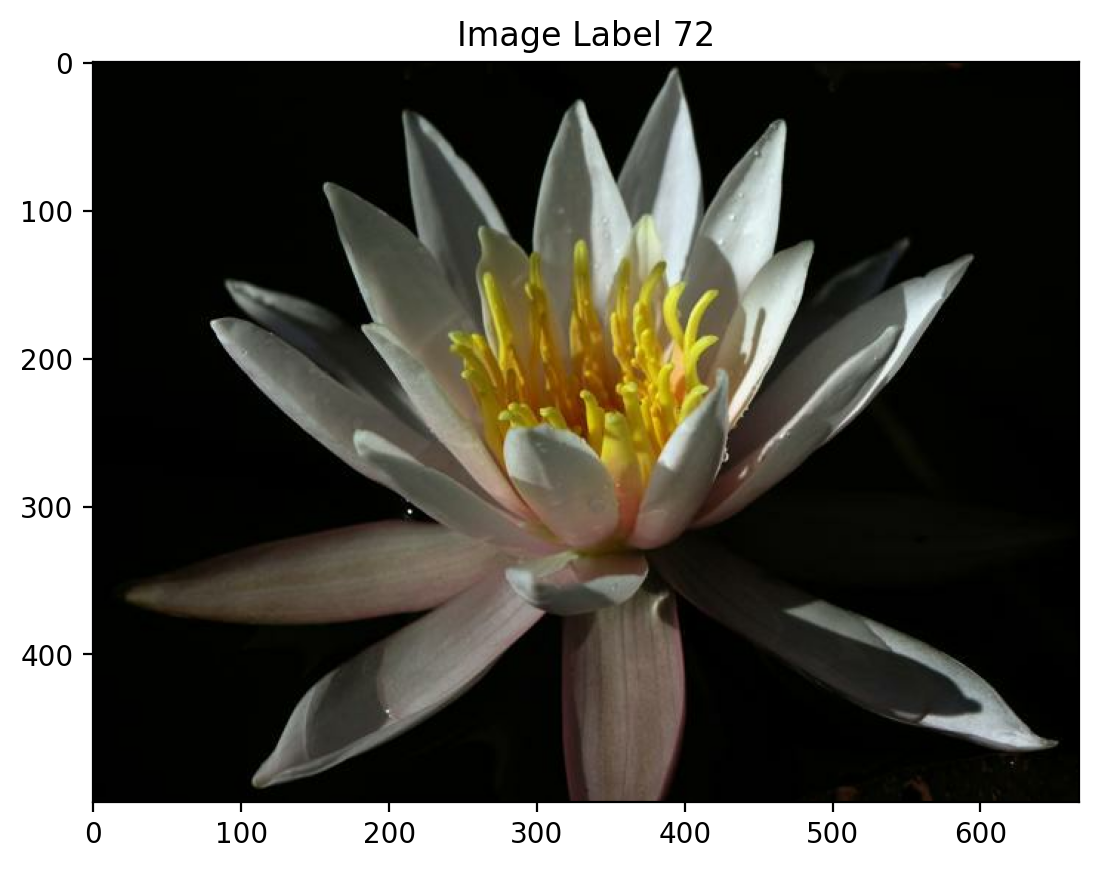

In [5]:
# TODO: Plot 1 image from the training set.
for image, label in training_set.take(1):
    image = image.numpy()
    label = label.numpy()

plt.figure()
plt.imshow(image)
#Set the title of the plot to the corresponding image label.
plt.title('Image Label {}'.format(label))
plt.grid(False)
plt.show()

### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [6]:
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

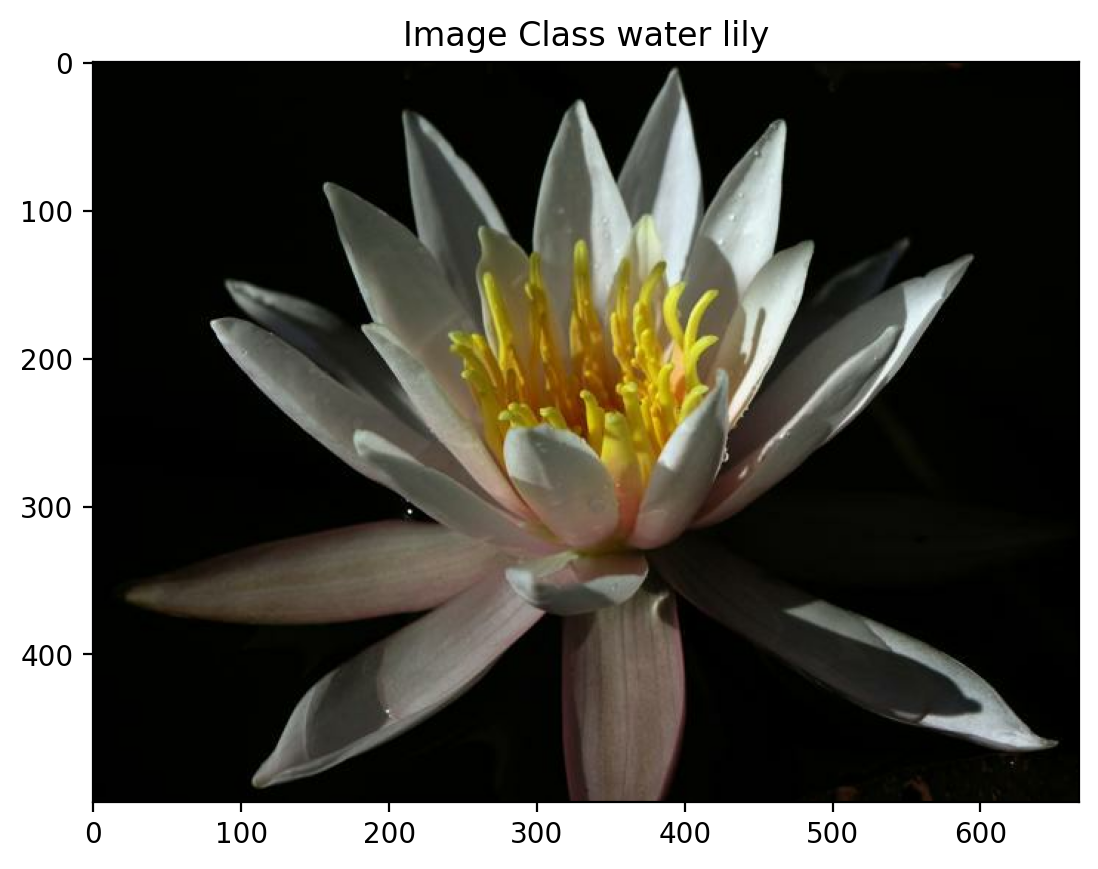

In [7]:
# TODO: Plot 1 image from the training set. 
for image, label in training_set.take(1):
    image = image.numpy()
    label = label.numpy()

plt.figure()
plt.imshow(image)
# Set the title of the plot to the corresponding class name. 
plt.title('Image Class {}'.format(class_names[str(label)]))
plt.grid(False)
plt.show()

## Create Pipeline

In [8]:
# TODO: Create a pipeline for each set.
batch_size = 32
image_size = 224

def format_image(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (image_size, image_size))
    image /= 255
    return image, label

training_batches = training_set.shuffle(train_size//4).map(format_image).batch(batch_size).prefetch(1)
validation_batches = validation_set.map(format_image).batch(batch_size).prefetch(1)
testing_batches = test_set.map(format_image).batch(batch_size).prefetch(1)

# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

In [9]:
# TODO: Build and train your network.

# Load the MobileNet pre-trained network from TensorFlow Hub.
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor = hub.KerasLayer(URL, input_shape=(image_size, image_size,3),trainable=False)


# Define a new, untrained feed-forward network as a classifier.
model = tf.keras.Sequential([
        feature_extractor,
        tf.keras.layers.Dense(num_classes, activation = 'softmax')])

model.summary()
print('\t\u2022 Running on GPU' if tf.test.is_gpu_available() else '\t\u2022 GPU device not found. Running on CPU')

# Train the classifier.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

EPOCHS = 50

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(training_batches,
                    epochs = EPOCHS,
                    validation_data=validation_batches,
                    callbacks=[early_stopping])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 102)               130662    
                                                                 
Total params: 2388646 (9.11 MB)
Trainable params: 130662 (510.40 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________
	• Running on GPU
Epoch 1/50
32/32 [==============================] - 19s 356ms/step - loss: 4.3075 - accuracy: 0.1147 - val_loss: 3.1548 - val_accuracy: 0.3490
Epoch 2/50
32/32 [==============================] - 11s 317ms/step - loss: 2.1213 - accuracy: 0.6804 - val_loss: 2.0448 - val_accuracy: 0.6304
Epoch 3/50
32/32 [==============================] - 11s 309ms/step - loss: 1.1048 - accuracy: 0.9088 - va

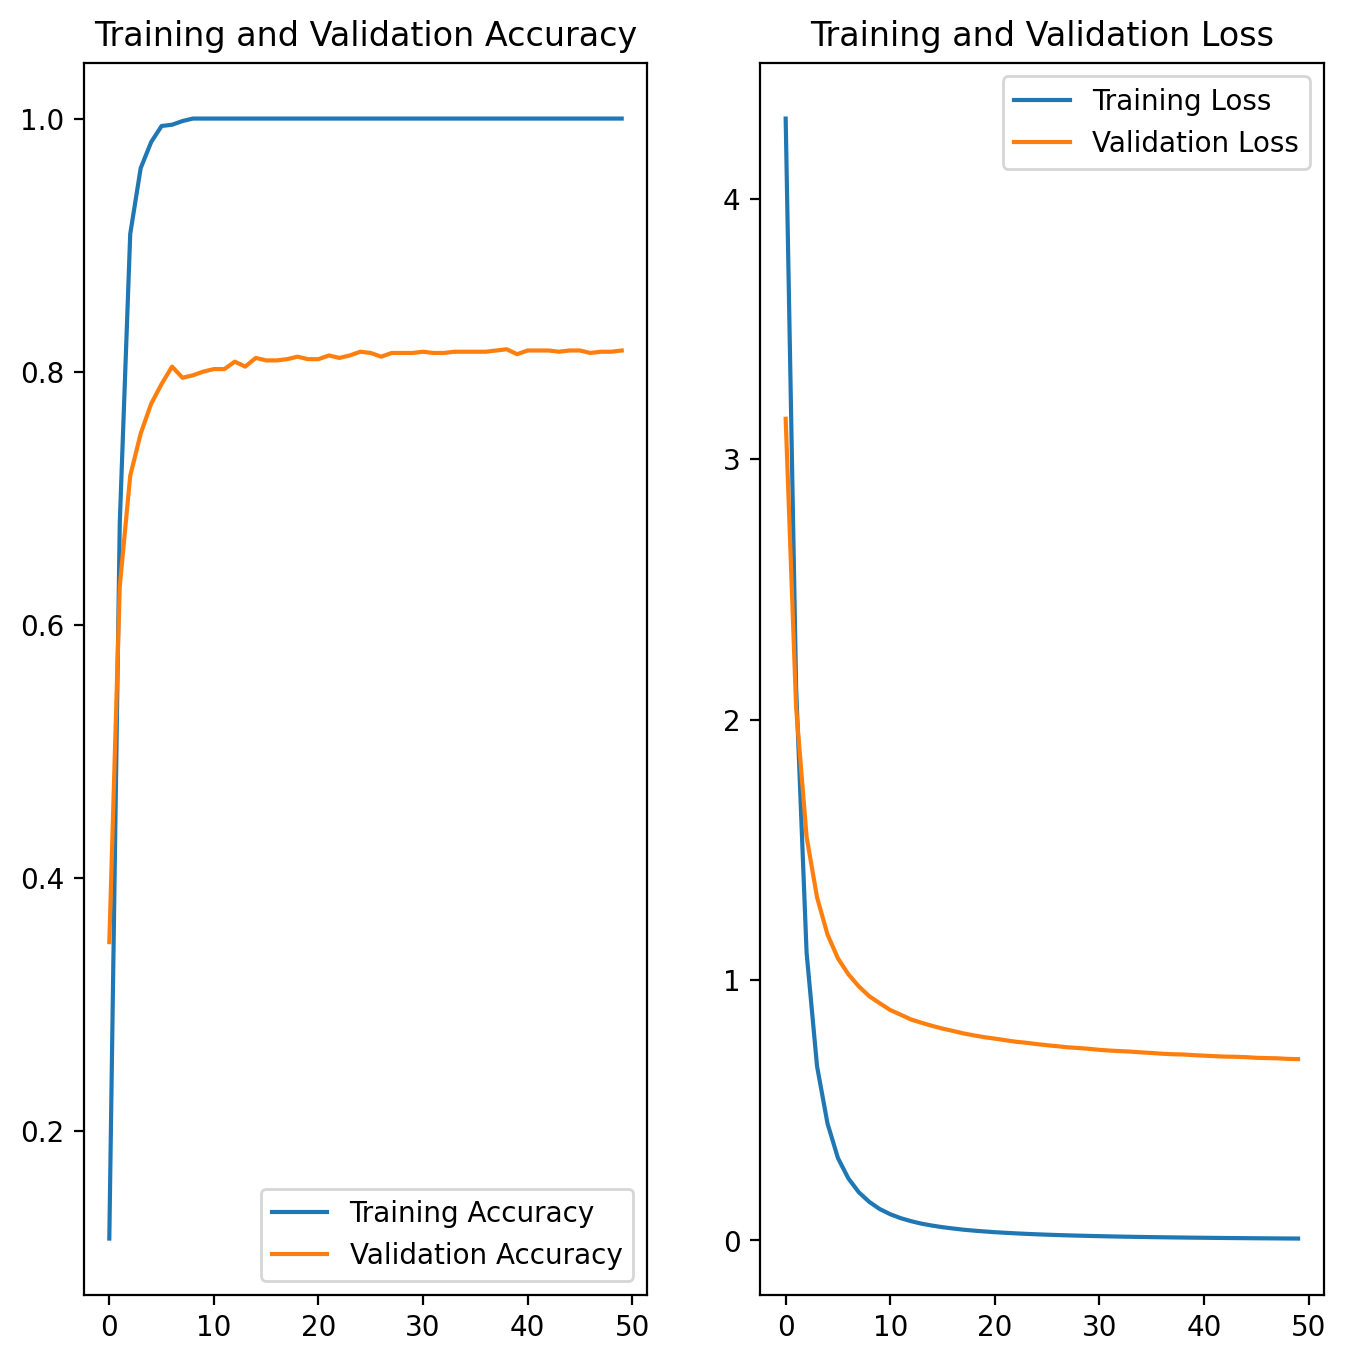

In [10]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(len(training_accuracy))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [11]:
# TODO: Print the loss and accuracy values achieved on the entire test set.
test_loss, test_accuracy = model.evaluate(testing_batches)
print('Test Loss: {:.4f}'.format(test_loss))
print('Test Accuracy: {:.4f}'.format(test_accuracy))

193/193 [==============================] - 31s 159ms/step - loss: 0.8320 - accuracy: 0.7852
Test Loss: 0.8320
Test Accuracy: 0.7852


## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [12]:
# TODO: Save your trained model as a Keras model.
timestamp = int(time.time())
saved_model_path = f'./model_{timestamp}.h5'

print('Saved Keras model to:', saved_model_path)
model.save(saved_model_path)

# List the files in the current directory to confirm the model was saved
!ls

Saved Keras model to: ./model_1747078945.h5


/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Project_Image_Classifier_Project.ipynb	label_map.json	     predict.py
README.md				model_1746949294.h5  test_images
assets					model_1747078945.h5


## Load the Keras Model

Load the Keras model you saved above.

In [13]:
# TODO: Load the Keras model
reloaded_keras_model = tf.keras.models.load_model('./model_1747078945.h5', custom_objects={'KerasLayer': hub.KerasLayer})

reloaded_keras_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 102)               130662    
                                                                 
Total params: 2388646 (9.11 MB)
Trainable params: 130662 (510.40 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [14]:
# TODO: Create the process_image function
def process_image(image_np_array):
    image = tf.convert_to_tensor(image_np_array, dtype=tf.float32)
    image = tf.image.resize(image, (image_size, image_size))
    image /= 255.0  # Normalize to [0, 1]
    return image

To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size. 

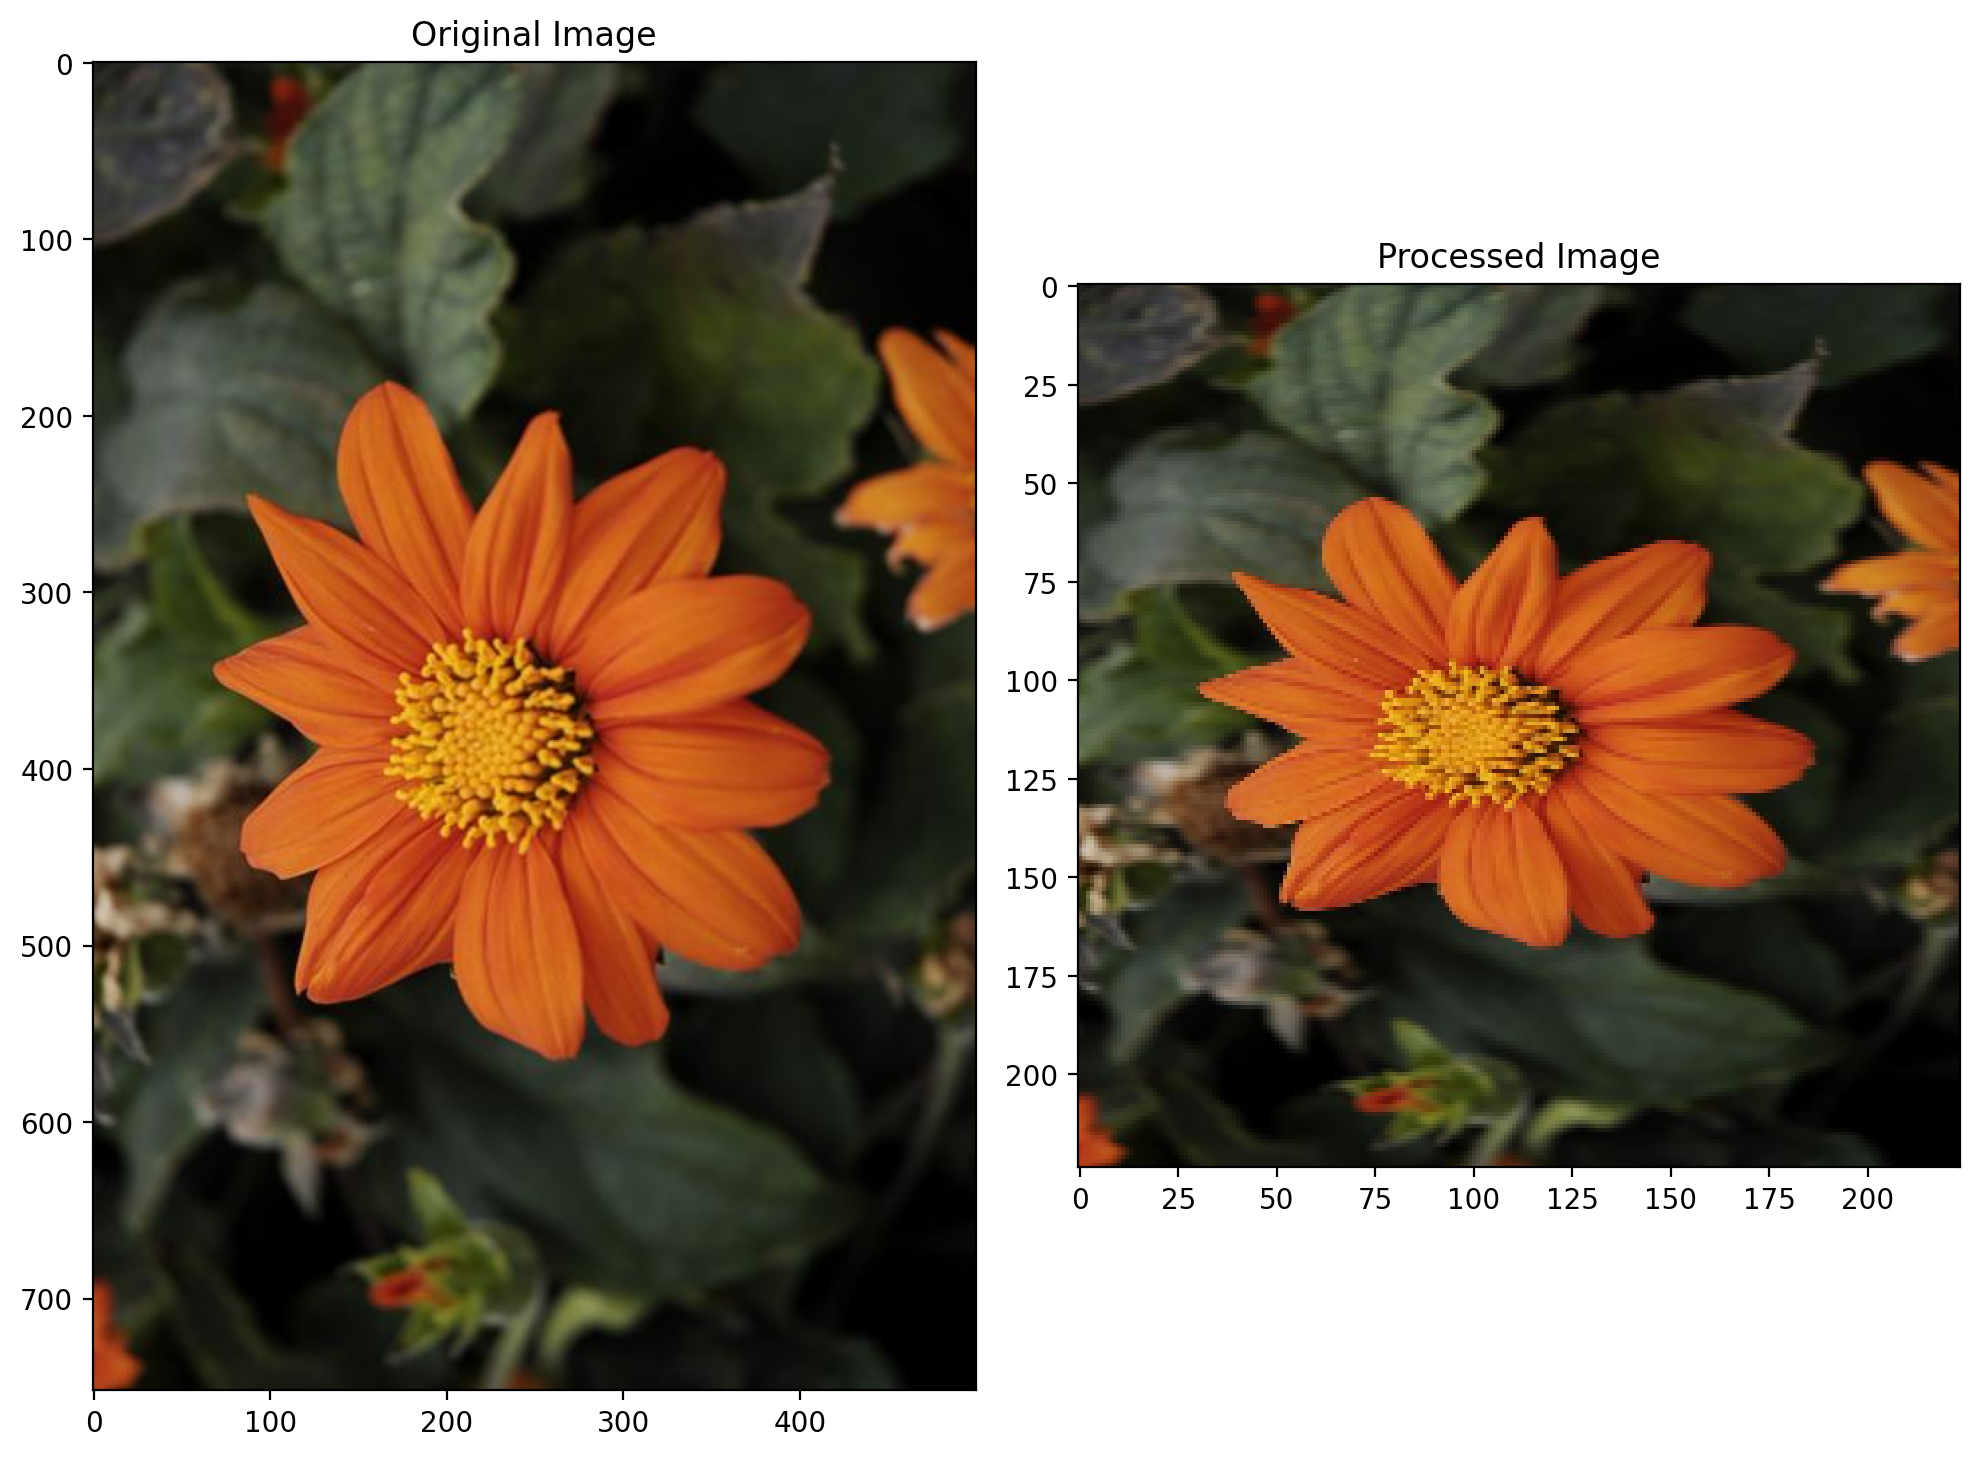

In [15]:
from PIL import Image

image_path = './test_images/orange_dahlia.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension. 

In [20]:
# TODO: Create the predict function
def predict(image_path, model, top_k):
    im = Image.open(image_path)
    im_arr = np.asarray(im)
    processed_im = process_image(im_arr)
    processed_im_batch = np.expand_dims(processed_im, axis=0)

    # Predict probabilities
    prediction = model.predict(processed_im_batch)

    # Get top K predictions
    probs, classes = tf.math.top_k(prediction, top_k)
    probs = probs.numpy().squeeze()
    classes = classes.numpy().squeeze()

    # Convert indices to strings to match label_map keys (e.g., "0", "1", ..., "101")
    classes = [str(cls) for cls in classes]

    return probs, classes

test_image_path = './test_images/hard-leaved_pocket_orchid.jpg'
test_top_k = 5
probs, classes = predict(test_image_path, reloaded_keras_model, test_top_k)

print(probs)
print(classes)

1/1 [==============================] - 0s 29ms/step
[9.99408245e-01 1.06819636e-04 8.50407450e-05 7.49815954e-05
 6.72398091e-05]
['1', '79', '5', '6', '19']


# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

['./test_images/cautleya_spicata.jpg', './test_images/orange_dahlia.jpg', './test_images/wild_pansy.jpg', './test_images/hard-leaved_pocket_orchid.jpg']
1/1 [==============================] - 0s 29ms/step


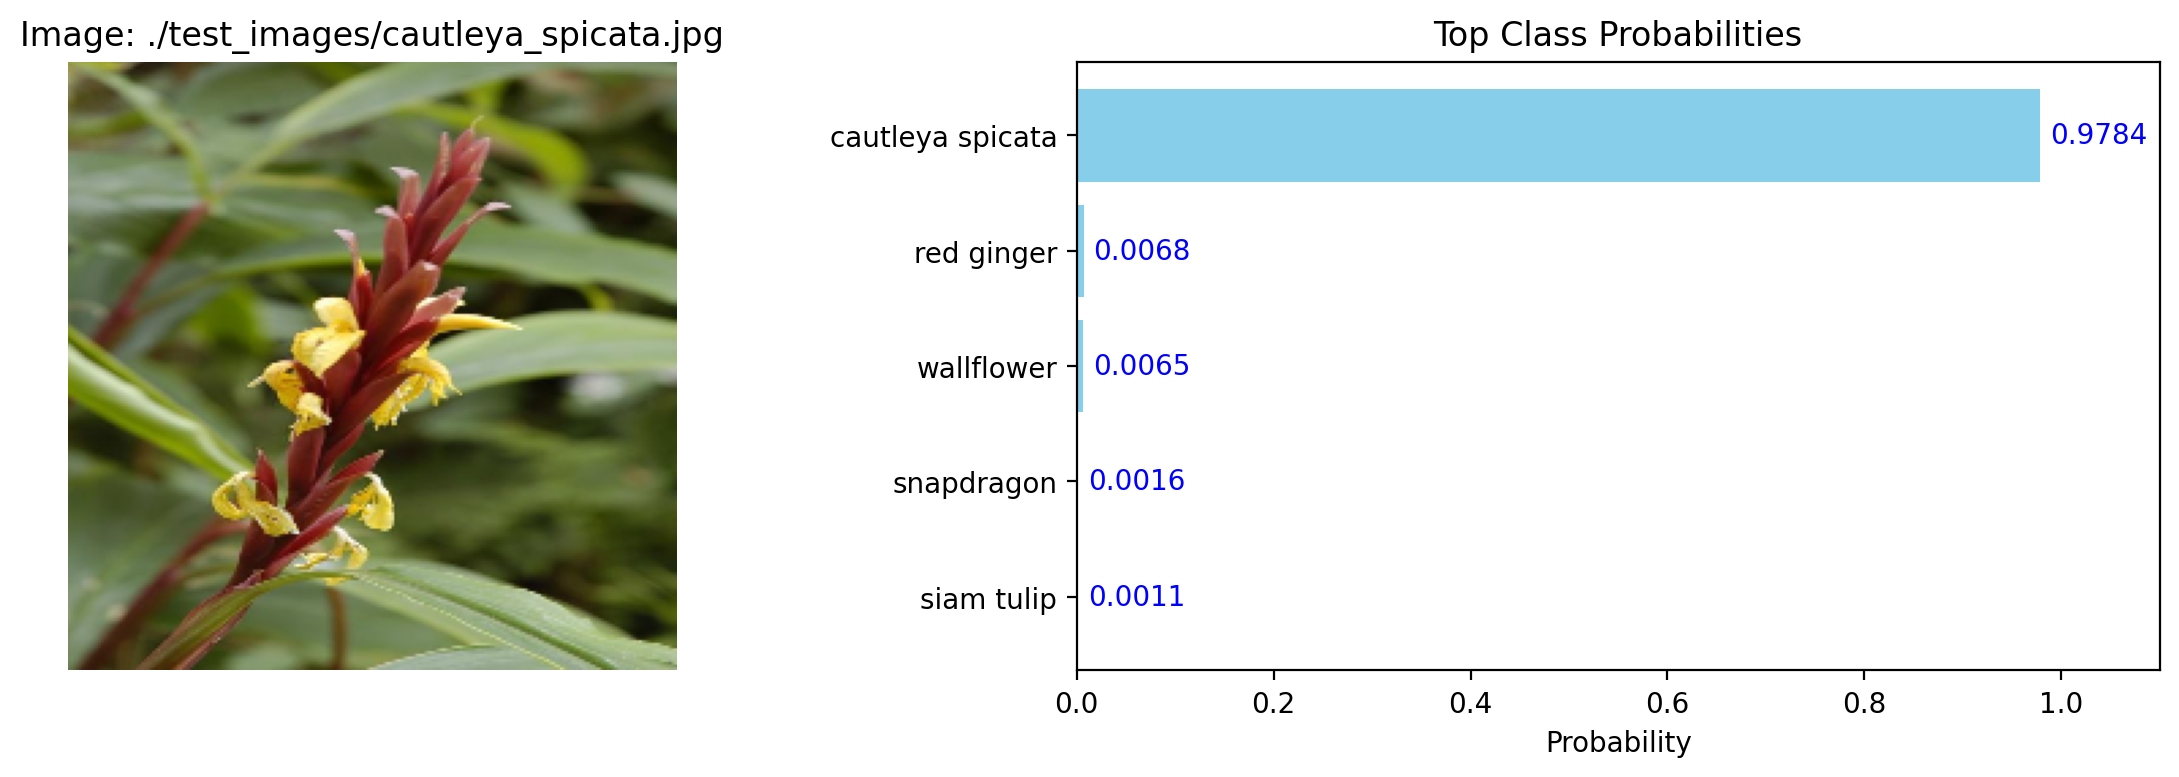

1/1 [==============================] - 0s 30ms/step


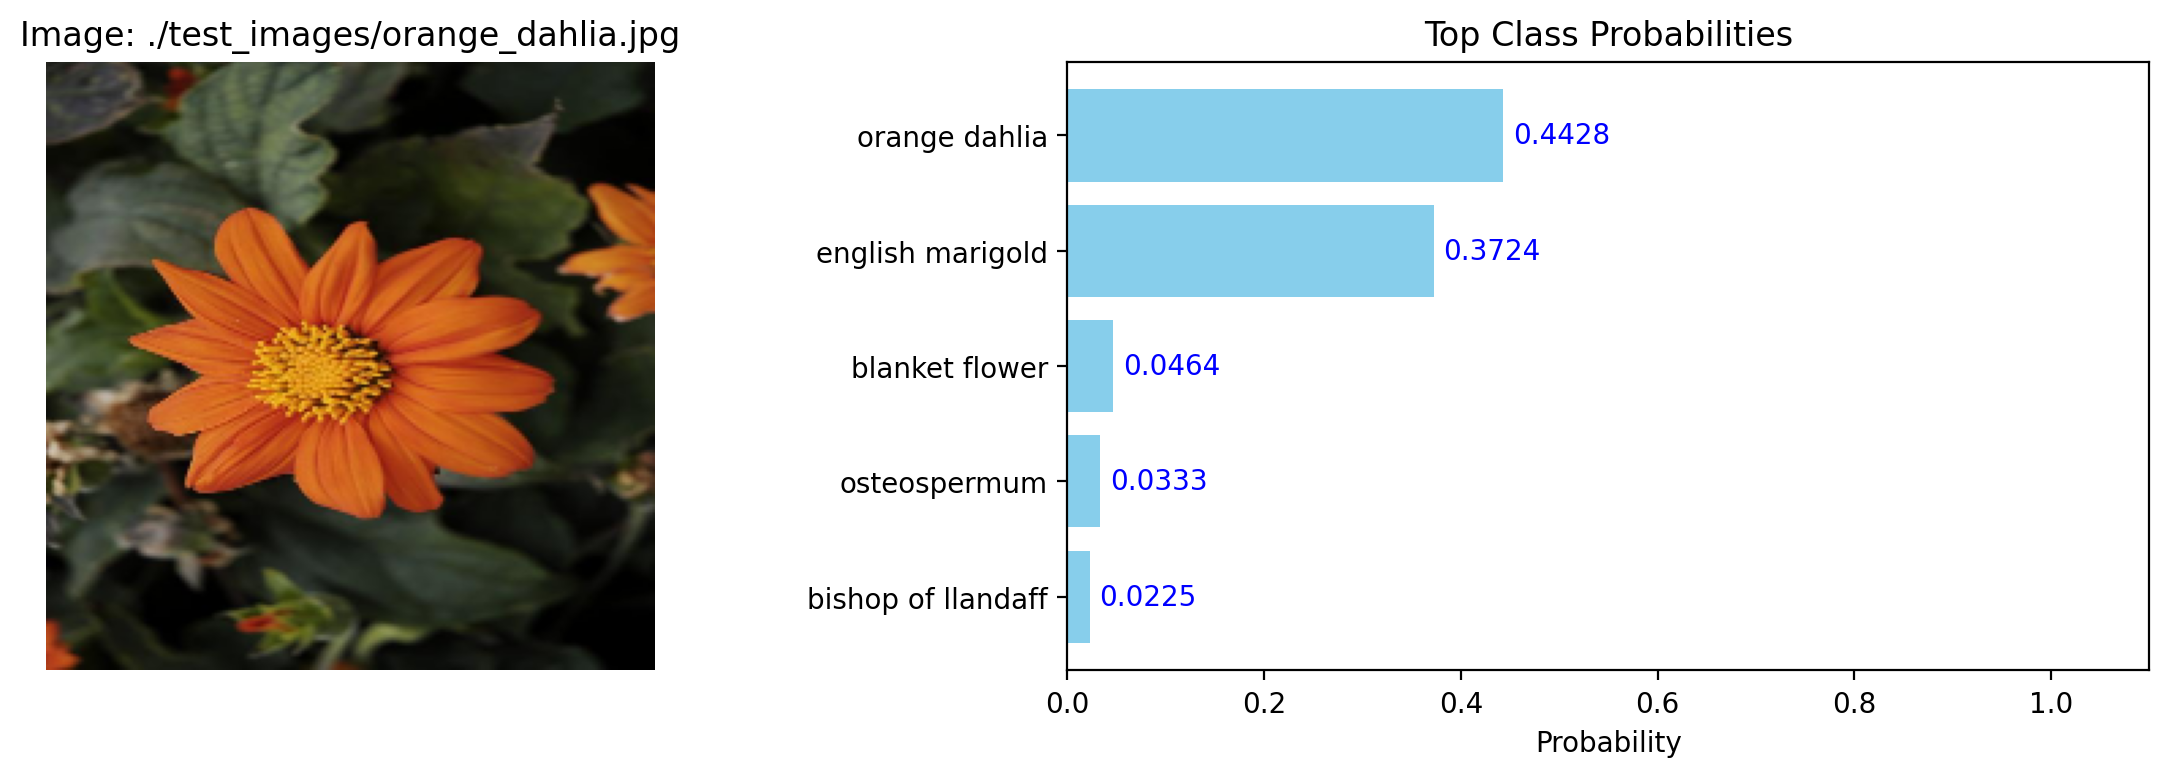

1/1 [==============================] - 0s 44ms/step


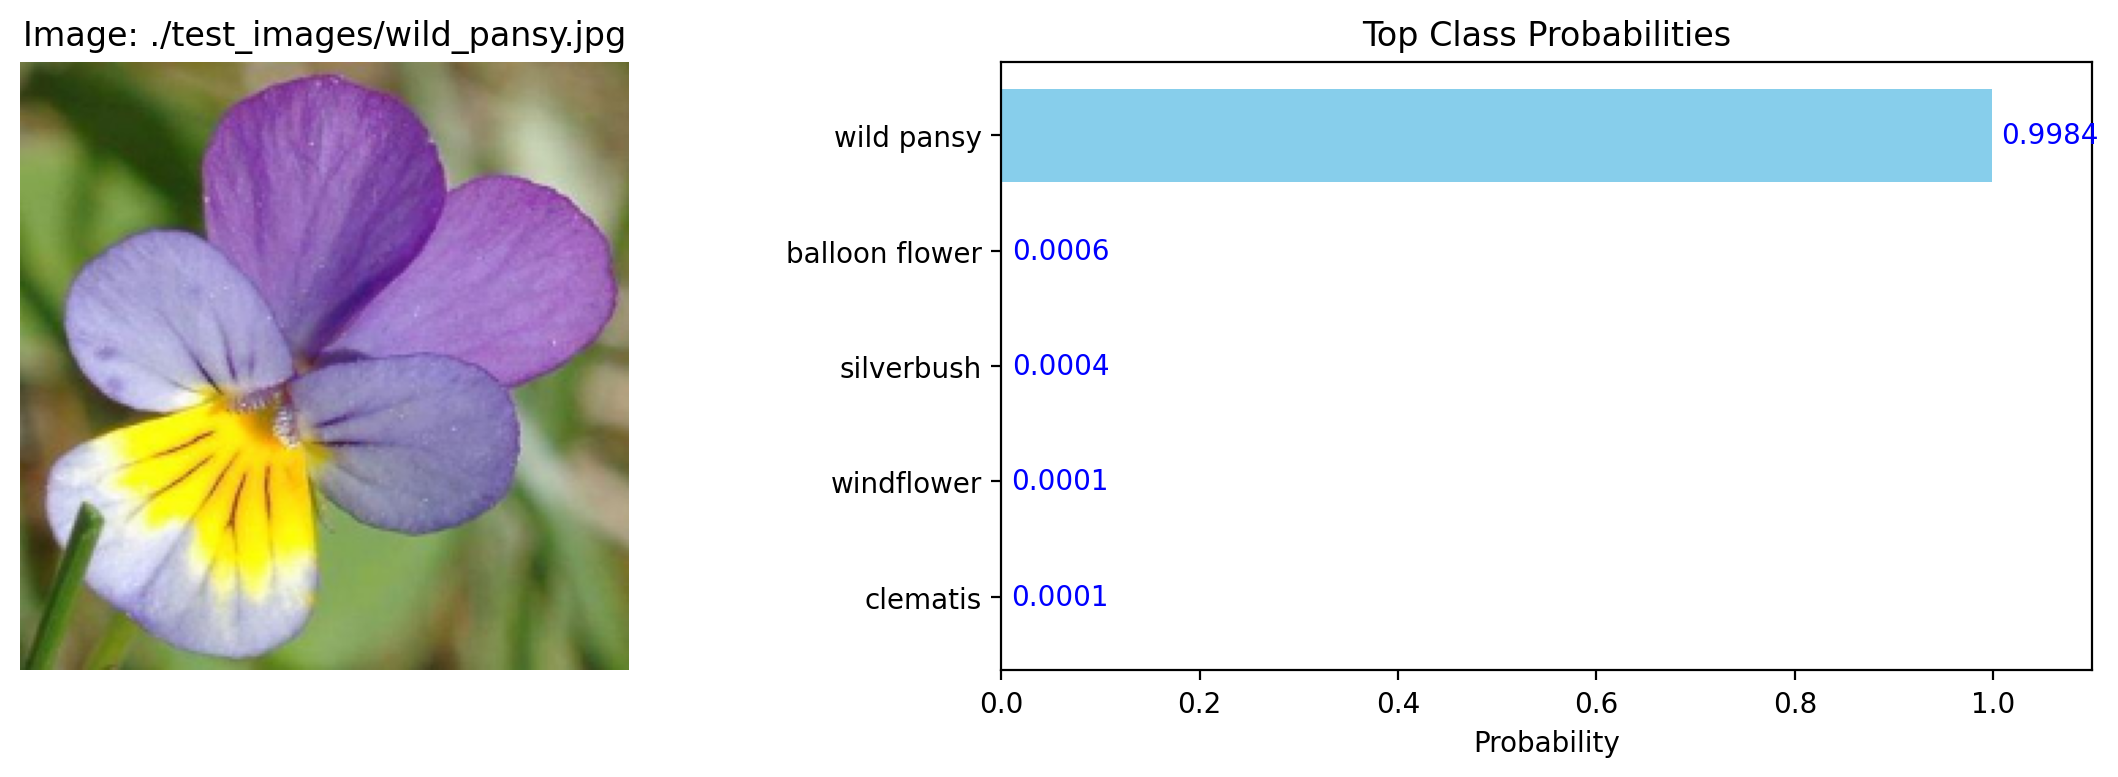

1/1 [==============================] - 0s 43ms/step


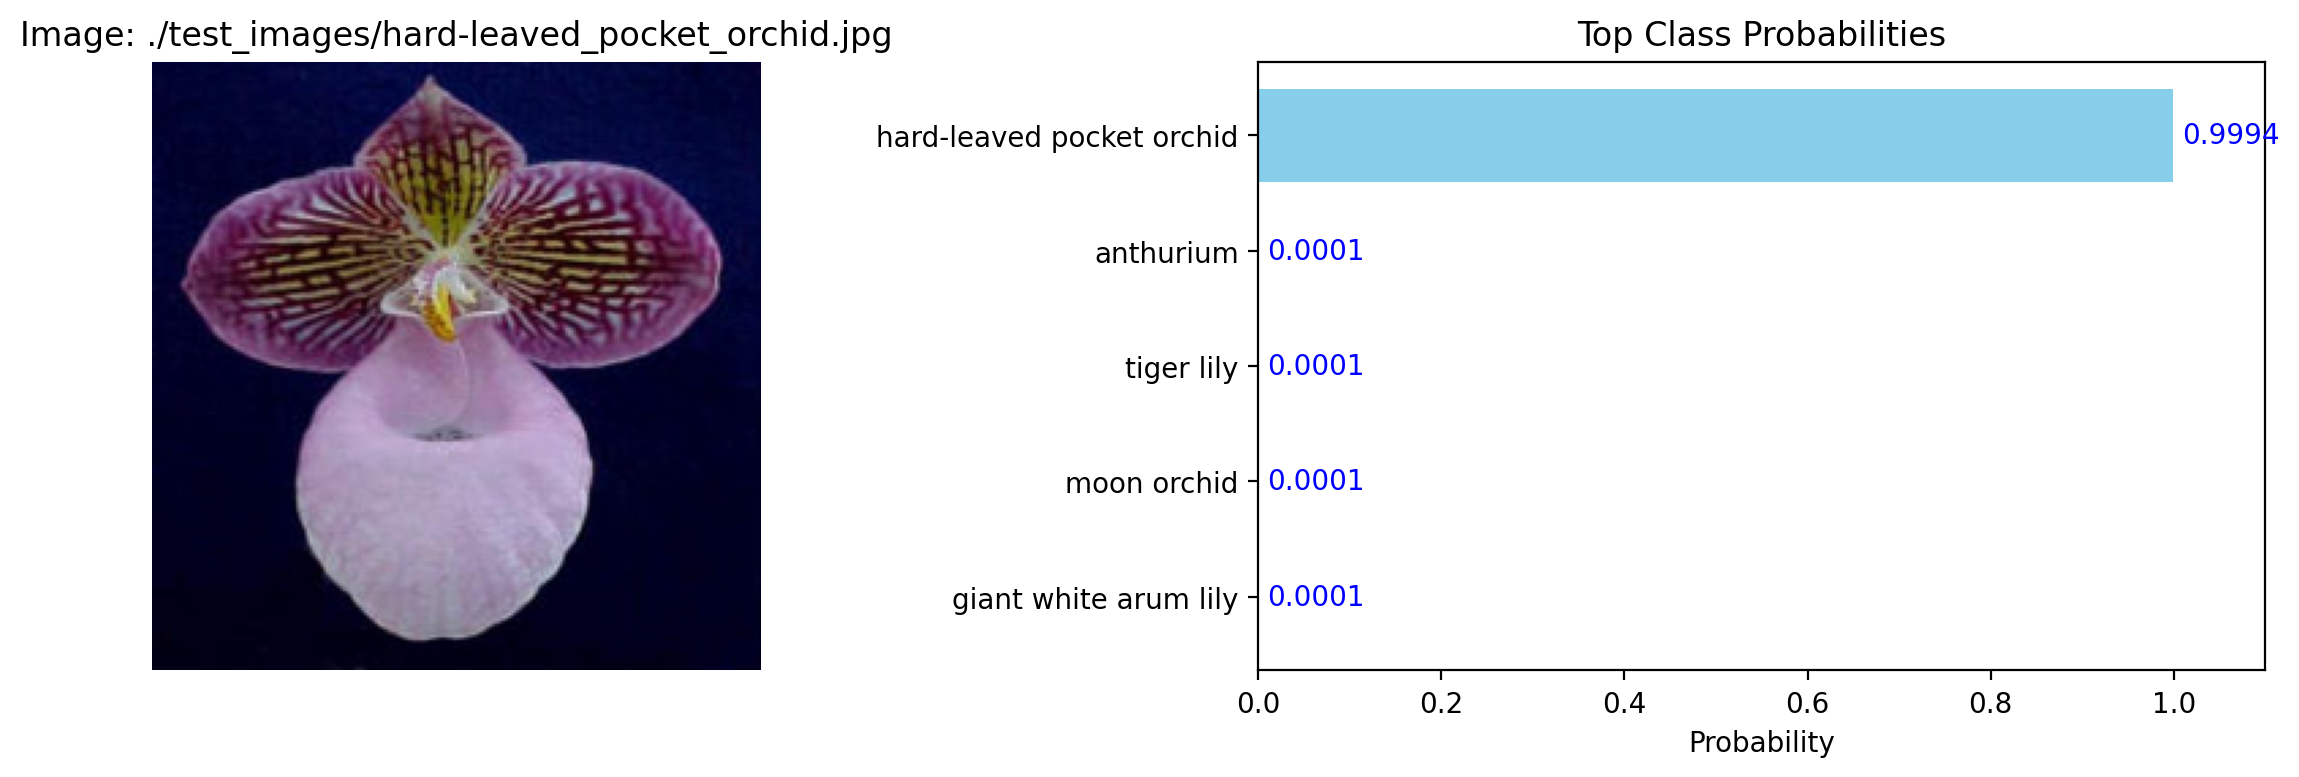

In [22]:
# Get test image paths
image_paths = glob.glob('./test_images/*.jpg')
print(image_paths)

for path in image_paths:
    # Open and process the image
    image = Image.open(path)
    image_np = np.asarray(image)
    processed_image = process_image(image_np)

    # Predict top classes
    probs, class_indices = predict(path, reloaded_keras_model, test_top_k)

    # No need to add +1 now since label_map starts at "0"
    corrected_class_indices = [str(idx) for idx in class_indices]
    class_labels = [class_names.get(label, f"Class {label}") for label in corrected_class_indices]

    # Plot image and bar chart
    fig, (ax1, ax2) = plt.subplots(figsize=(12, 4), ncols=2)

    # Show image
    ax1.imshow(processed_image)
    ax1.set_title(f"Image: {path}")
    ax1.axis('off')

    # Plot probabilities
    ax2.barh(class_labels[::-1], probs[::-1], color='skyblue')
    ax2.set_title('Top Class Probabilities')
    ax2.set_xlim(0, 1.1)
    ax2.set_xlabel('Probability')

    # Annotate bars
    for i, v in enumerate(probs[::-1]):
        ax2.text(v + 0.01, i, f"{v:.4f}", va='center', color='blue')

    plt.tight_layout()
    plt.show()
